# 手写Logistic Regression

- 数学推导与公式
   - 逻辑回归实际上是一个线性的分类器
   - 决策函数(二分类)
      $$f(x)= arg\max_{Y}^{}\left( P(Y=0|x),P(Y=1|x)  \right)  = sign(wx+b)$$
      
      $$ P(Y=0|x) = sigmoid(wx+b) $$
      $$ P(Y=1|x) = 1-P(Y=0|x)$$
      
      $$sigmoid(x) = \frac{1}{1+e_{}^{-x}}$$

   - 最优化问题
     $$arg\max_{w,b}   ln L(w,b)= \sum_{i=1}^{n}\left( (1-y_{i}) \cdot lnP(Y=0|x_{}^{i})+y_{i}\cdot lnP(Y=1|x_{}^{i}) \right)$$
     
     代入$ P(Y=0|x)=\frac{1}{1+e_{}^{-wx}}$计算得到
     $$ ln L(w,b)= -\sum_{i=1}^{n}  \left( y_{i}\cdot w x_{}^{i} + ln(1+e_{}^{-wx_{}^{i}}) \right)$$
   
     计算梯度
     $$\nabla ln L = \frac{\sigma L}{\sigma w} =  \sum_{i=1}^{n}x_{}^{i} \cdot(sigmoid(w\cdot x_{}^{i}) - y_{i})$$
     
   - 学习方法：梯度上升
       $$ w_{}^{t+1} = w_{}^{t} + \frac{\sigma L}{\sigma w}$$
    为加速训练，也可以采用SGD进行训练
    
 <br>
 <br>
 
- 多分类问题
   - 将sigmoid函数换成softmax函数
   - 参数量 $w:(c-1)\cdot m$ , $b:c-1$


- 引入正则项
    - L1与L2
    

- 求解非线性问题
   - 引入核函数
      - 多项式核

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 

class LogisticRegression:
    
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(x))
    
    def __init__(self):
        self.x = None
        self.y = None
        self.w = None
        
        
    @staticmethod
    def kernal_fun(x,arg = 5,kernal = 'ploy'):
        t = np.array(x)
        if kernal == 'ploy':
            for i in range(arg):
                for j in range(i):               
                    t = np.hstack((t,np.c_[(x[:,0]**(i-j))*(x[:,1]**j)]))          
        return t
        
    def fit(self,train_x,train_y,max_iters = 10000,lr = 0.001 , batch_size = 0 , show_fun = None):      
        num,features = train_x.shape
        self.x = np.hstack((np.array(train_x),np.ones((num,1))))
        self.y = np.array(train_y) # 0 and 1
        self.y = self.y[:,np.newaxis]
        self.w = np.array(np.random.normal(size = (features+1)))
        L = []
        for i in range(max_iters):
            sigma = self.SGD(batch_size) # 计算梯度
            self.w = self.w + lr*sigma
            fx =  LogisticRegression.sigmoid(np.sum(self.w*self.x))
            loss = np.sum(self.y.T*(np.sum(self.w*self.x,axis=1)) - np.log(1+np.exp(np.sum(self.w*self.x,axis=1))))
            if show_fun is not None:
                show_fun(i,loss,self.w)    
            L.append(-loss)
        return L
            
    
    def SGD(self,batch_size):
        batch = None
        label = None
        if batch_size == 0:
            batch = self.x
            label = self.y
        else:
            pass
        sigma = np.sum(label*batch - ((1-LogisticRegression.sigmoid(np.sum(self.w*batch,axis=1)))*batch.T).T  ,axis = 0)
        return sigma
        
        
        
    def predict(self,x,kernel = 'ploy'):
        n,_ = x.shape
        test_x = np.array(x)
        if  kernel == 'ploy' or kernel == ():
            kernel = LogisticRegression.kernal_fun
            test_x = kernel(test_x)
        elif kernel == 'linear':
            pass
        test_x = np.hstack((test_x,np.ones((n,1))))
        p0 = LogisticRegression.sigmoid(np.sum(self.w*test_x,axis=1))
        h = np.where(p0>0.5,0,1)
        return h

开始训练
训练完成
[ 0.14984457 -7.33927953 -1.95980424 -8.56979912 -2.86788374  3.2420606
 -3.40466085  1.78110065  1.53756949  0.74059023 -1.07344314  0.890405
  4.1612172 ]


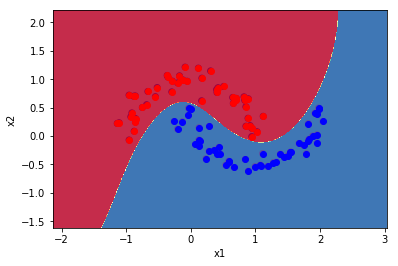

In [34]:
def plot_decision_boundary(model, X, y,*args):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()],args)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

[x,y] = datasets.make_moons(100,noise= 0.1)

# x0
LR = LogisticRegression()
print('开始训练')
Loss = LR.fit(LogisticRegression.kernal_fun(x),y)
print('训练完成')
# print(x)
h = LR.predict(x)

print(LR.w)
x0 = x[np.where(h==0)]
x1 = x[np.where(h==1)]

plot_decision_boundary(LR.predict,x.T,y)
plt.scatter(x0[:,0],x0[:,1],c = 'r')
plt.scatter(x1[:,0],x1[:,1],c = 'b')



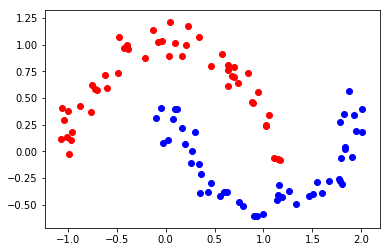

In [7]:
[x,y] = datasets.make_moons(100,noise= 0.1)
x0 = x[np.where(y==0)]
x1 = x[np.where(y==1)]
plt.scatter(x0[:,0],x0[:,1],c = 'r')
plt.scatter(x1[:,0],x1[:,1],c = 'b')

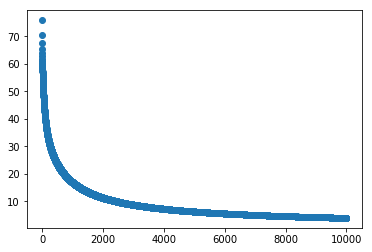

In [11]:
plt.scatter(range(len(Loss)),Loss)

开始训练
训练完成
[ 7.68289006 -5.38369801  1.20656901]


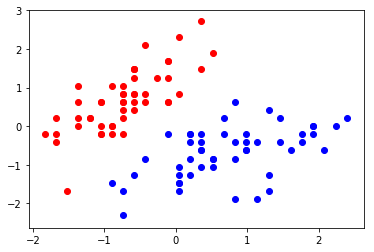

In [36]:
iris = datasets.load_iris()
xx = iris.data
yy = iris.target


x = xx[np.where(yy < 2),0:2]
x = x[0,:]
y = yy[np.where(yy < 2)]

# 数据标准化
x = (x-np.mean(x,axis=0))/np.std(x,axis=0)

LR_iris = LogisticRegression()

print('开始训练')
Loss = LR_iris.fit(x,y)
print('训练完成')
# print(Loss)
h = LR_iris.predict(x,'linear')

print(LR_iris.w)
x0 = x[np.where(h==0)]
x1 = x[np.where(h==1)]

# plot_decision_boundary(LR_iris.predict,x.T,y,'linear')
plt.scatter(x0[:,0],x0[:,1],c = 'r')
plt.scatter(x1[:,0],x1[:,1],c = 'b')

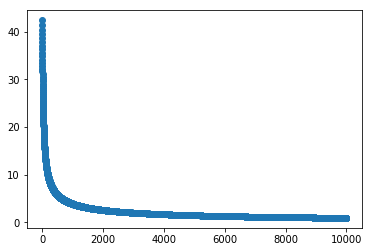

In [37]:
plt.scatter(range(len(Loss)),Loss)